[*********************100%%**********************]  1 of 1 completed


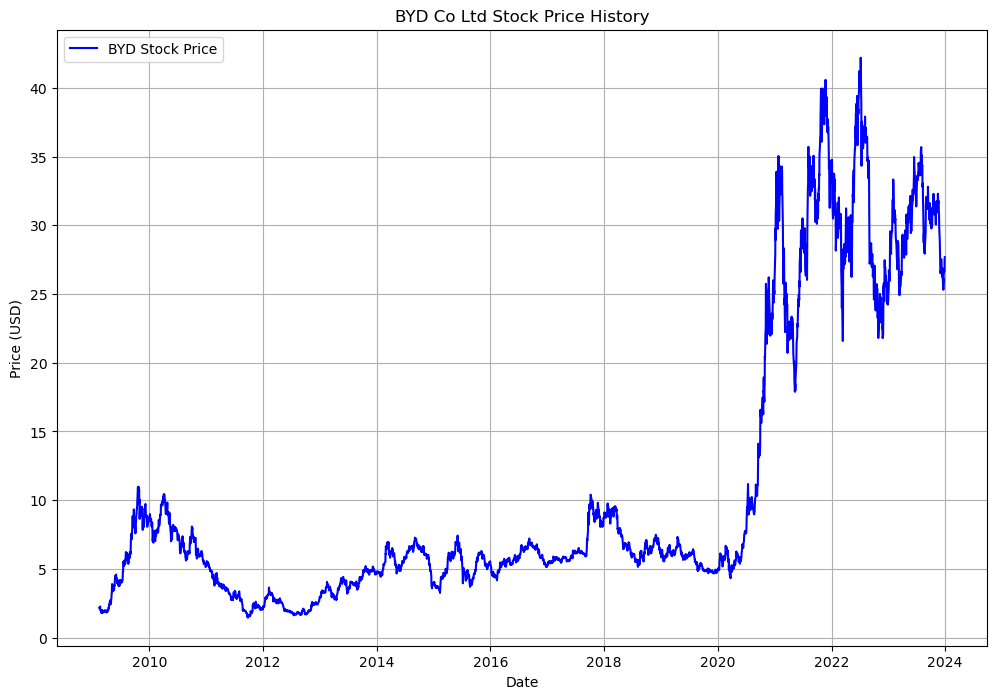

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch BYD stock data at a daily interval
ticker_symbol = "BYDDF"  # BYD Co Ltd's stock symbol
start_date = "2000-01-01"
end_date = "2024-01-01"
byd_stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Plot the stock price history
plt.figure(figsize=(12, 8))
plt.plot(byd_stock_data['Adj Close'], label='BYD Stock Price', color='blue')
plt.title('BYD Co Ltd Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

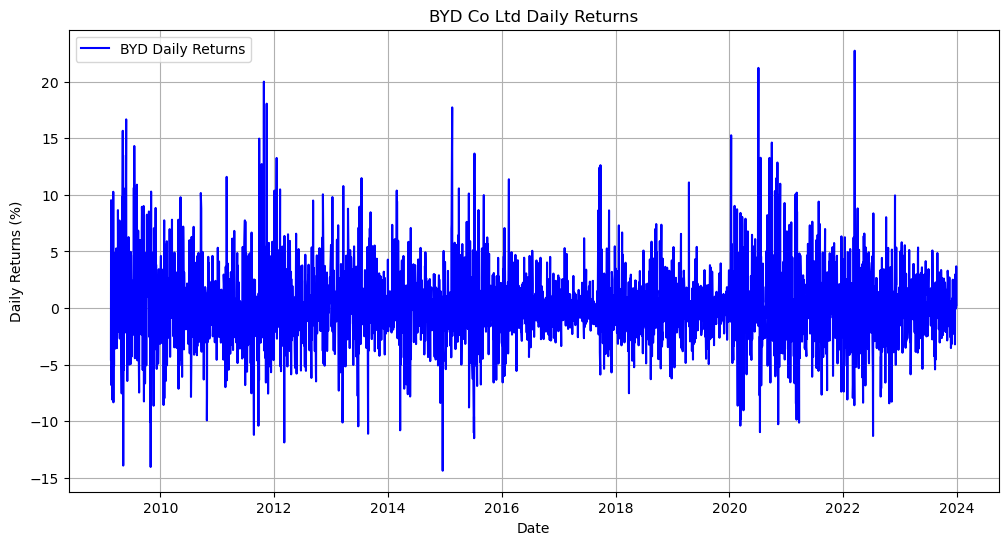

In [4]:
byd_stock_data['Daily_Return'] = byd_stock_data['Adj Close'].pct_change() * 100

# Plot the daily returns
plt.figure(figsize=(12, 6))
plt.plot(byd_stock_data.index, byd_stock_data['Daily_Return'], label='BYD Daily Returns', color='blue')
plt.title('BYD Co Ltd Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Specify the number of regimes (2 in this case)
num_regimes = 2

# Fit the Markov Switching Model to the daily returns
model = sm.tsa.MarkovRegression(
    byd_stock_data['Daily_Return'],
    k_regimes=num_regimes,
    switching_variance=True
)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Estimate the duration of staying in each regime
print("Expected duration in each regime:", results.expected_durations)

C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:           Daily_Return   No. Observations:                 3744
Model:               MarkovRegression   Log Likelihood               -9444.318
Date:                Thu, 11 Jan 2024   AIC                          18900.636
Time:                        04:18:54   BIC                          18938.004
Sample:                             0   HQIC                         18913.926
                               - 3744                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1067      0.052     -2.069      0.039      -0.208      -0.006
sigma2         4.0506      0.256     15.804      0.0

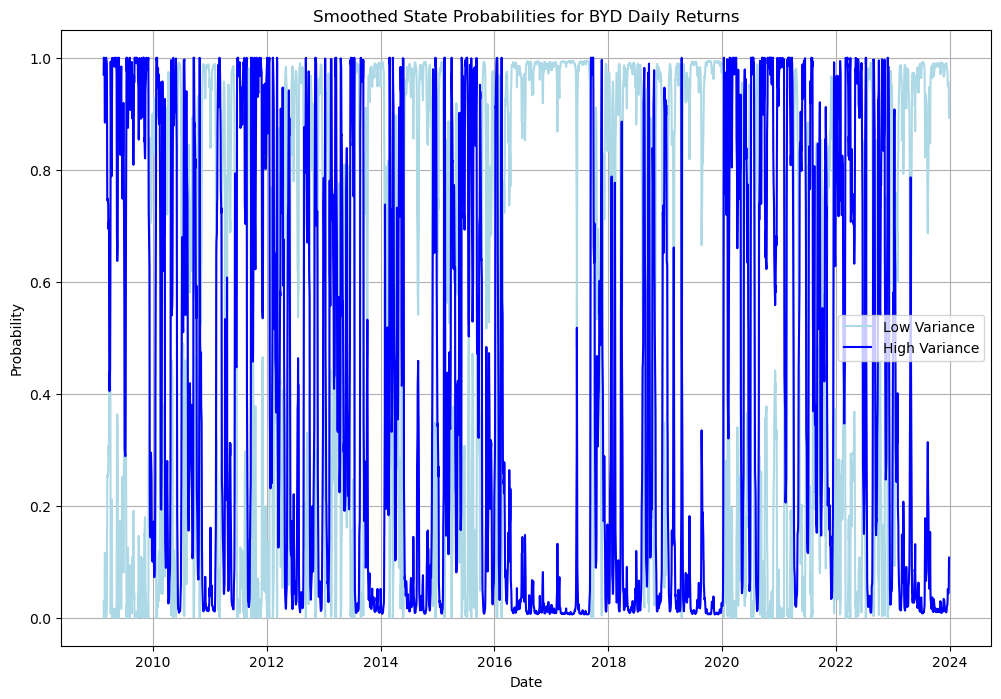

In [8]:
# Plot the smoothed state probabilities for the daily returns
plt.figure(figsize=(12, 8))
plt.plot(
    byd_stock_data.index,
    results.smoothed_marginal_probabilities[0],
    label='Low Variance',
    color='lightblue'
)
plt.plot(
    byd_stock_data.index,
    results.smoothed_marginal_probabilities[1],
    label='High Variance',
    color='blue'
)
plt.title('Smoothed State Probabilities for BYD Daily Returns')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

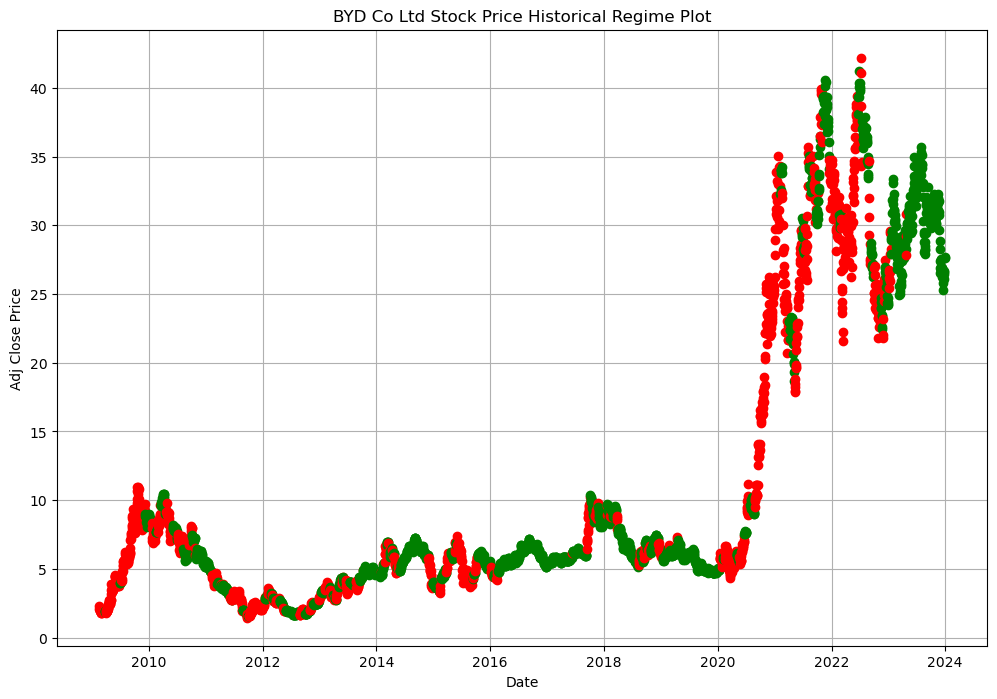

In [24]:
import matplotlib.pyplot as plt

# Plot the historical stock price of BYD with green for regime 1 and red for regime 2
plt.figure(figsize=(12, 8))
for index, row in byd_stock_data.iterrows():
    color = 'green' if results.smoothed_marginal_probabilities[0][index] > results.smoothed_marginal_probabilities[1][index] else 'red'
    plt.plot(index, row['Adj Close'], marker='o', color=color)

plt.title('BYD Co Ltd Stock Price Historical Regime Plot')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.grid(True)
plt.show()
